In [1]:
#%matplotlib inline
import time
import cv2

import numpy as np
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
from IPython import display
from skimage.draw import circle

In [2]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

In [3]:
video_path = 'imgs/traffic.avi'
video_capture = cv2.VideoCapture(video_path)

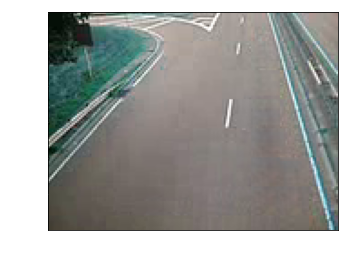

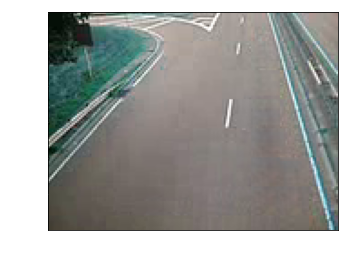

In [4]:
while video_capture.isOpened():
    _, frame = video_capture.read()
    if not frame is None:
        plt.imshow(frame)
        plt.draw()
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(.01)
    else:
        plt.draw()
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(.01)
        break

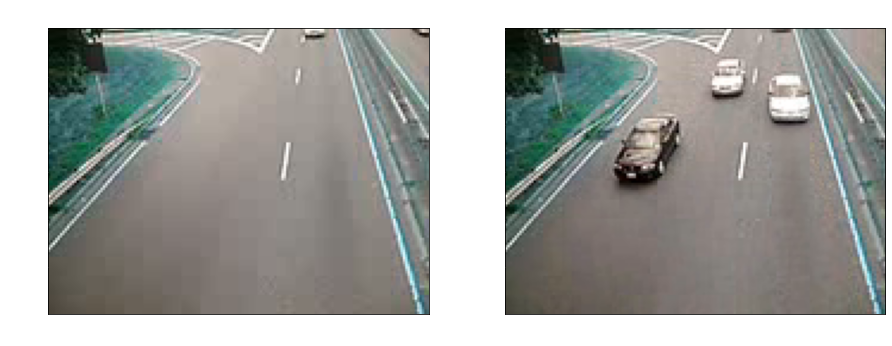

In [5]:
width  = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
height = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
length = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

video_capture.set(cv2.CAP_PROP_POS_FRAMES,0)
_, background_image = video_capture.read()

video_capture.set(cv2.CAP_PROP_POS_FRAMES, 67)
_, image_with_cars = video_capture.read()

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(background_image)
plt.title("background_image")
plt.subplot(122)
plt.title("Image wit cars")
plt.imshow(image_with_cars)

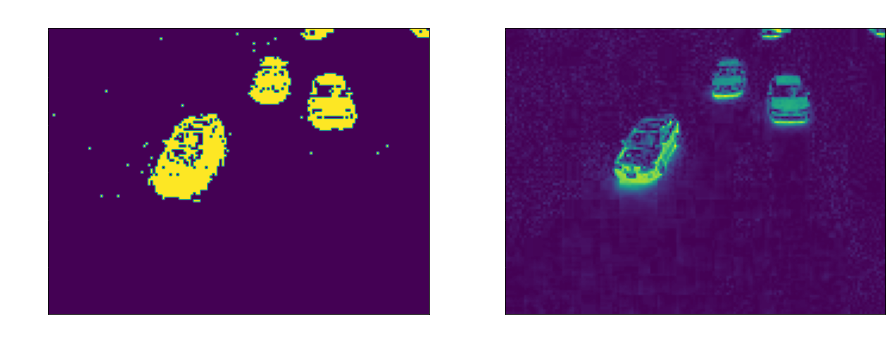

In [6]:
from skimage.measure import label, regionprops, regionprops_table
from skimage import morphology

diff_image = np.abs(rgb2gray(background_image) - rgb2gray(image_with_cars))

diff_thresholded = diff_image*255 > 20

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(diff_thresholded)
plt.title("background_image")
plt.subplot(122)
plt.title("Image wit cars")
plt.imshow(diff_image)

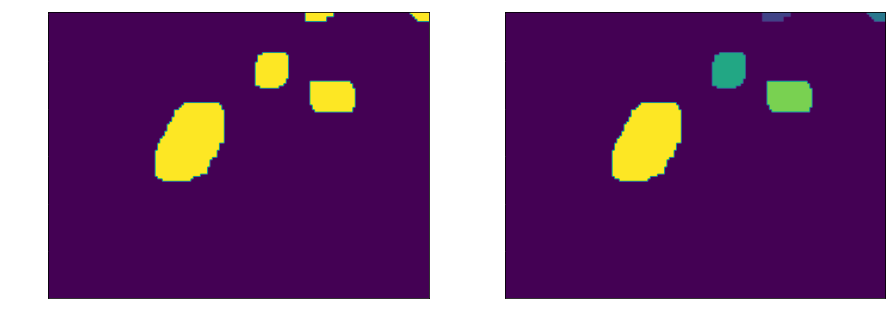

In [7]:
diff_thresholded = morphology.opening(
    morphology.remove_small_holes(diff_thresholded,area_threshold=64),
    selem=morphology.selem.rectangle(8,8))
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(diff_thresholded)

label_img = label(diff_thresholded)
regions = regionprops(label_img)
plt.subplot(122)
plt.imshow(label_img)

<Figure size 1080x720 with 0 Axes>

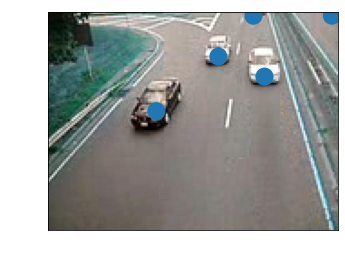

In [8]:
import matplotlib.patches as patches
plt.figure(figsize=(15,10))
fig,ax = plt.subplots(1)
ax.imshow(image_with_cars)

for region in regions:
    centroid_viz =patches.Circle((region.centroid[1], region.centroid[0]))
    ax.add_patch(centroid_viz)

In [14]:
from skimage.draw import disk, circle
video_capture = cv2.VideoCapture(video_path)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('./imgs/tagged_cars.avi',fourcc, fps, (height,width))

while(video_capture.isOpened()):
    ret, frame = video_capture.read()
    if ret==True:
        #1 Detekcia objektov
        diff_image = np.abs(rgb2gray(background_image) - rgb2gray(frame))
        #2 Prahovanie objektov
        diff_thresholded = diff_image*255 > 20
        #3 Morfologicke operacie
        diff_thresholded = morphology.opening(
        morphology.remove_small_holes(diff_thresholded,area_threshold=64),
        selem=morphology.selem.rectangle(8,8))

        label_img = label(diff_thresholded)
        regions = regionprops(label_img)
        #4 Uprava vystupu na zaklade
        for region in regions:
            rr, cc = disk((region.centroid[0], region.centroid[1]), 1)
            frame[rr, cc,:2] = 0
            frame[rr, cc, 2] = 255


        out.write(frame)
    else:
        break

video_capture.release()
out.release()
# DU 74-77

<ipython-input-17-cfb79fc553f4>:28: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  rr, cc = circle(region.centroid[0], region.centroid[1], 1)
<ipython-input-17-cfb79fc553f4>:63: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  rr, cc = circle(line[j][k][0], line[j][k][1], 1)
<ipython-input-17-cfb79fc553f4>:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 10))


19


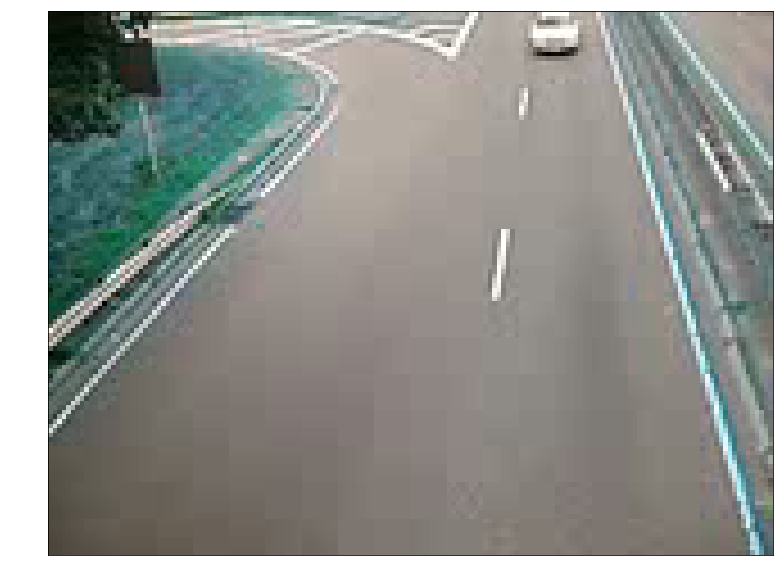

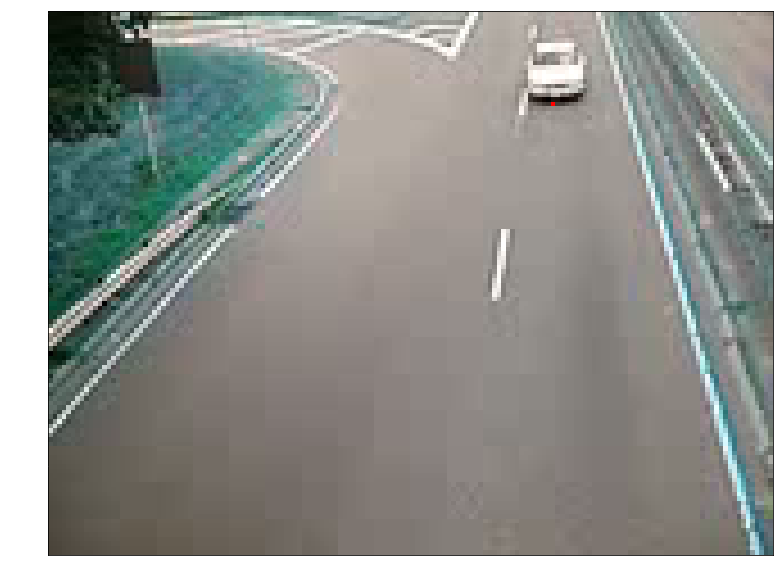

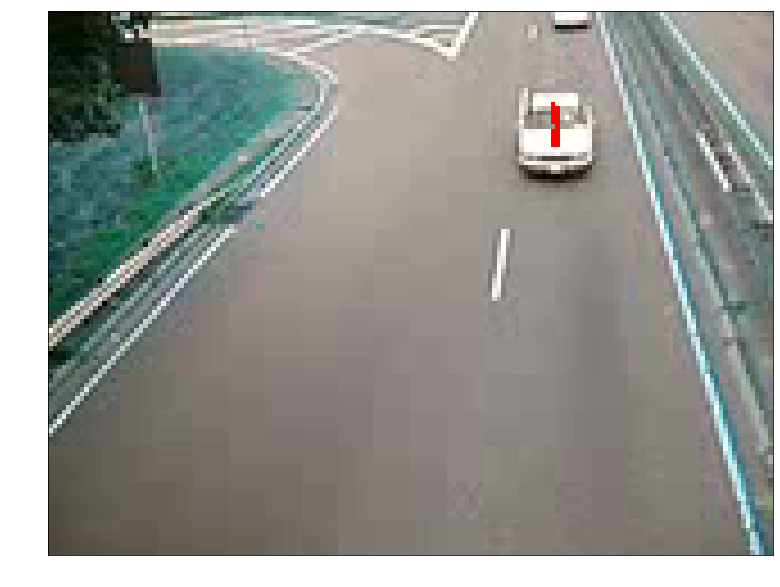

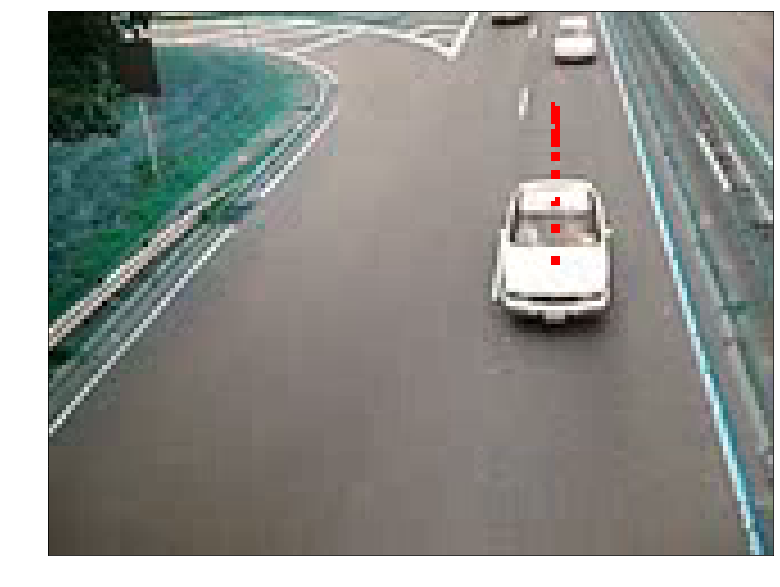

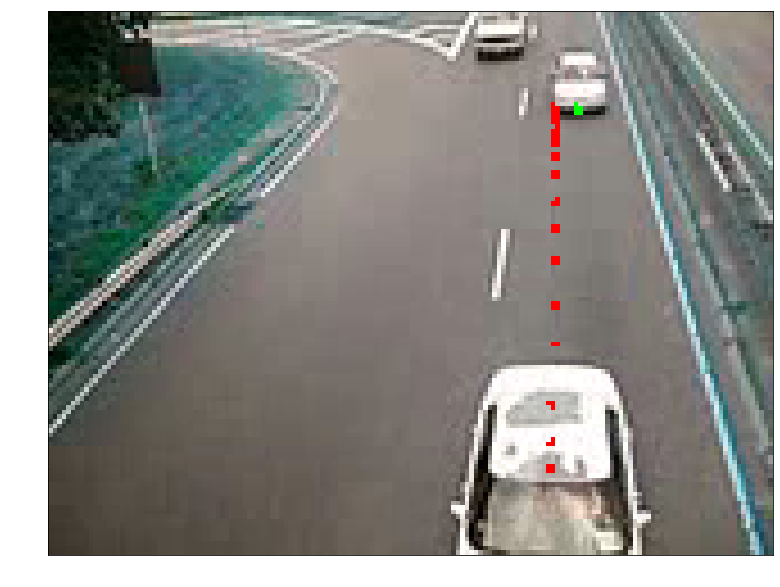

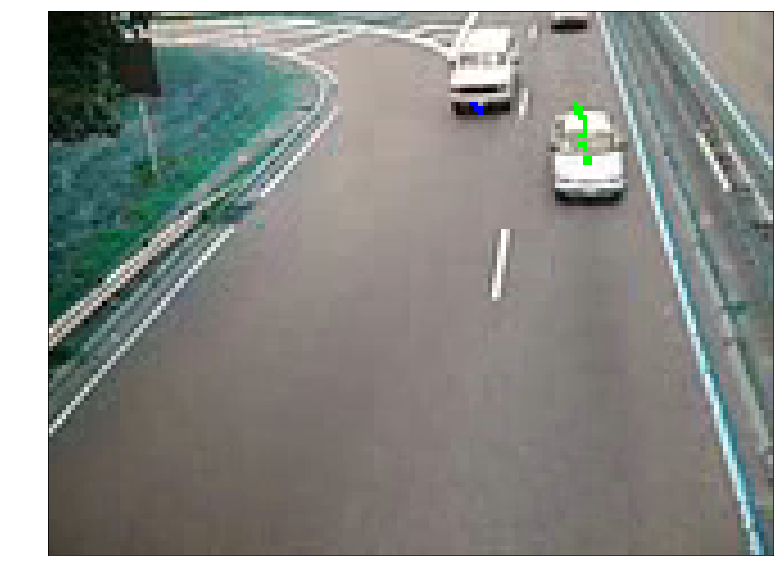

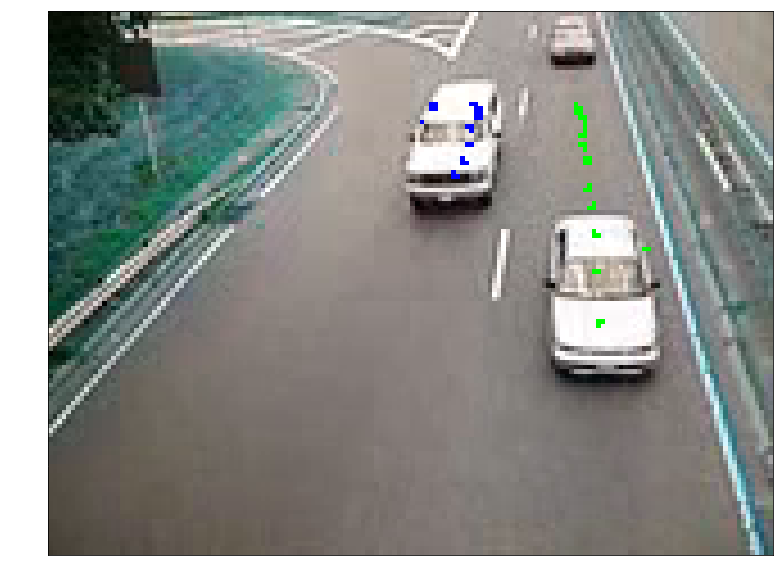

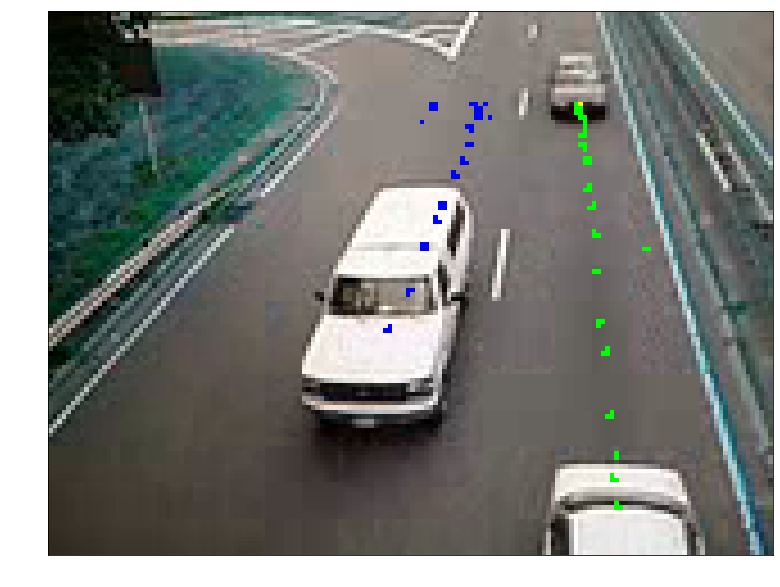

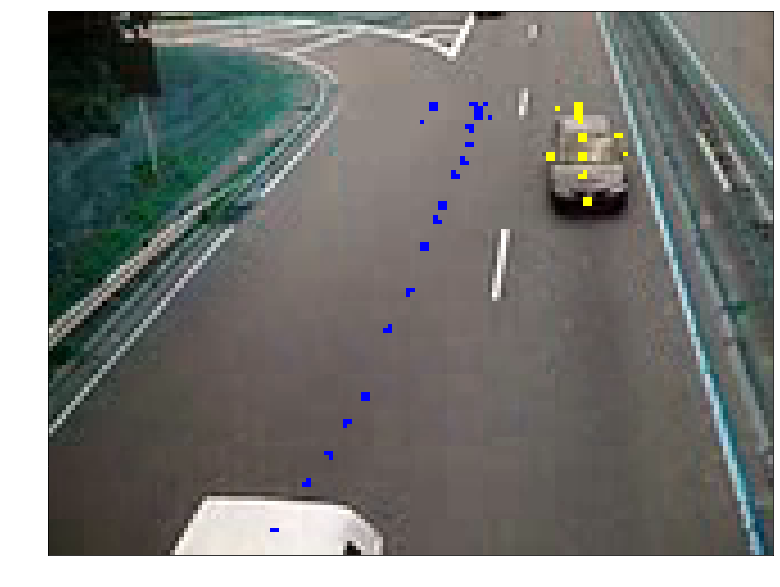

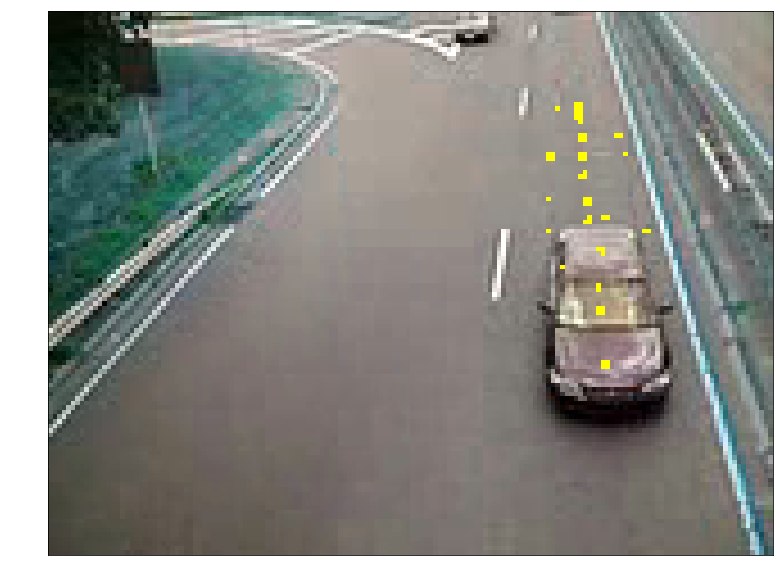

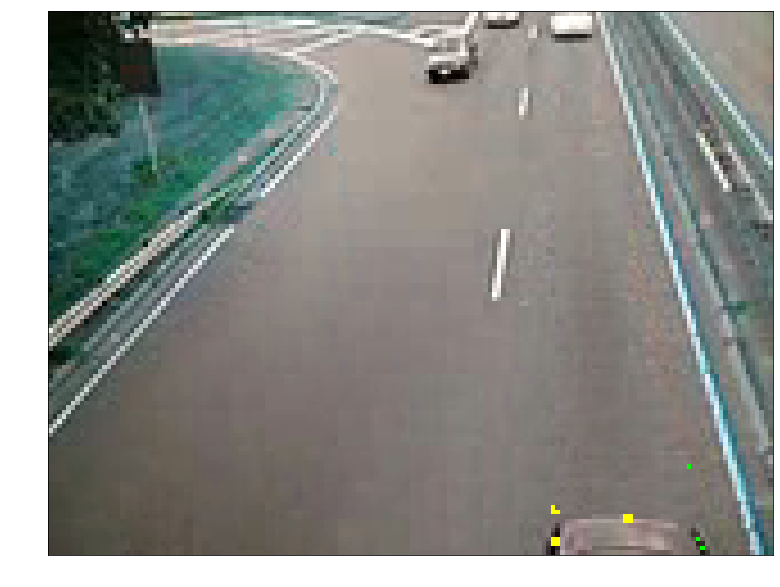

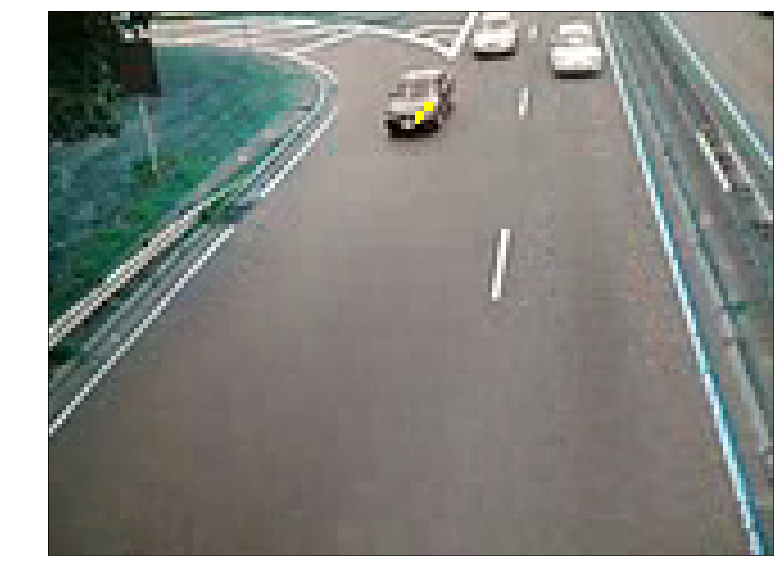

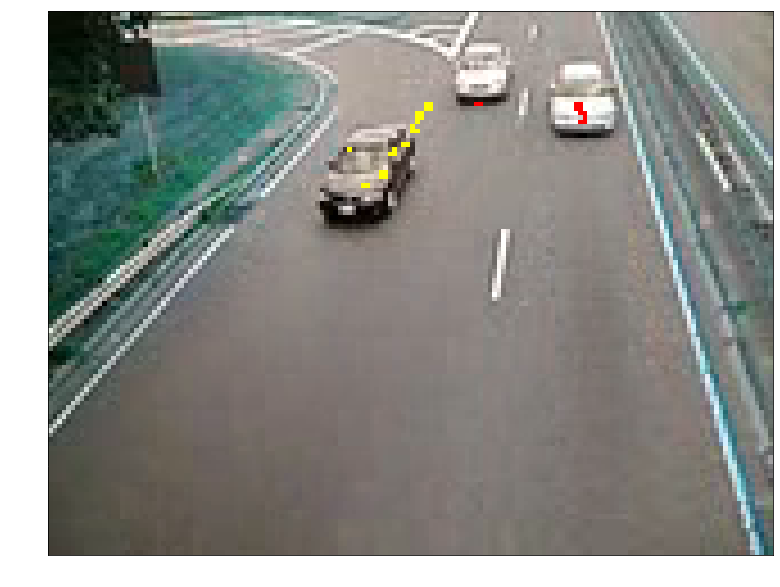

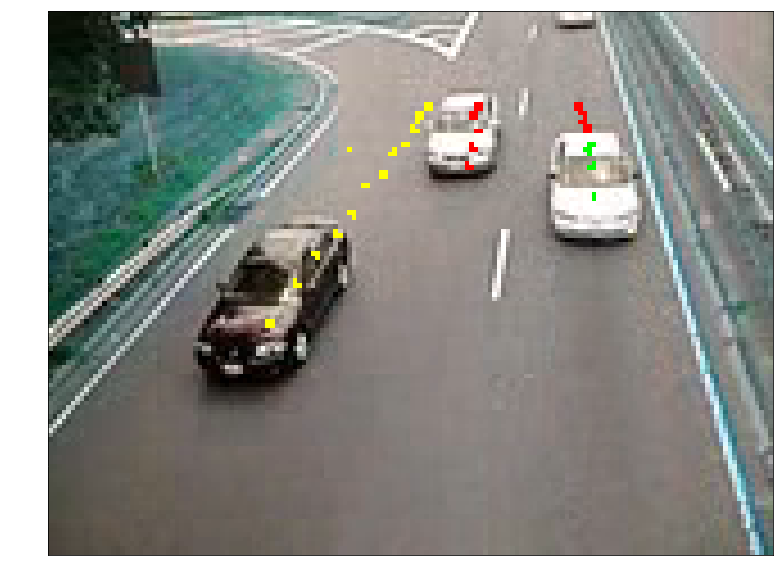

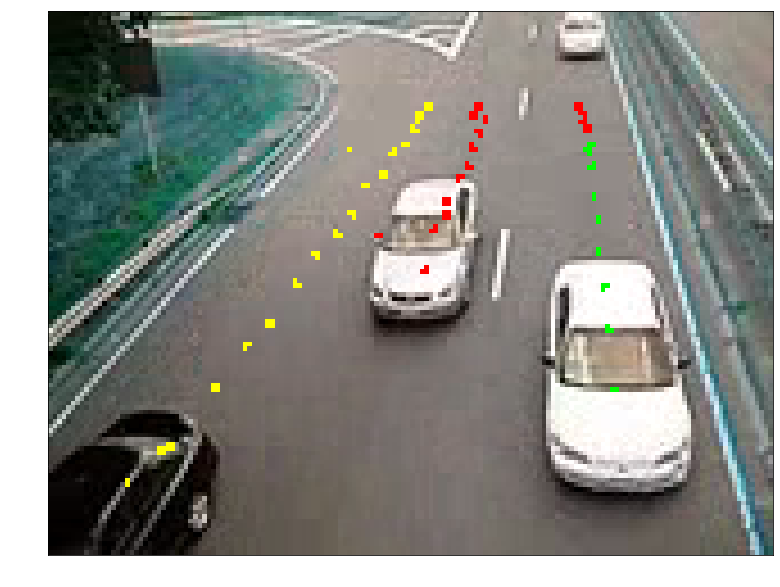

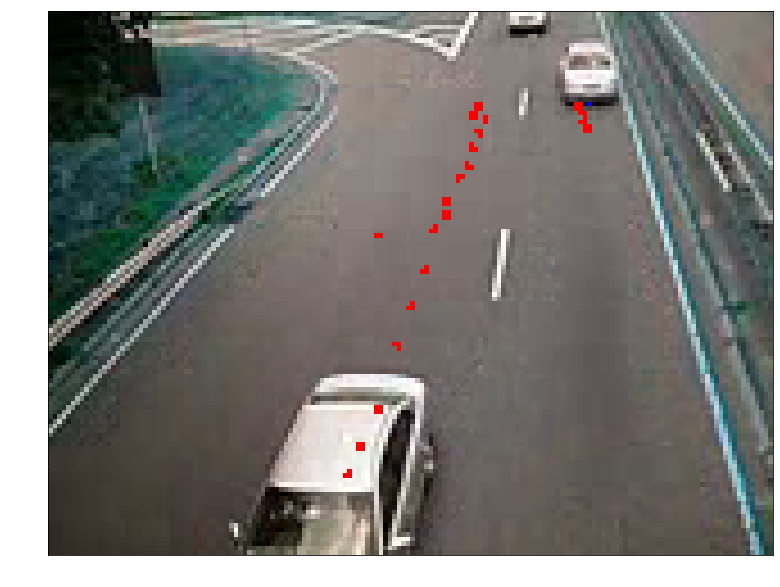

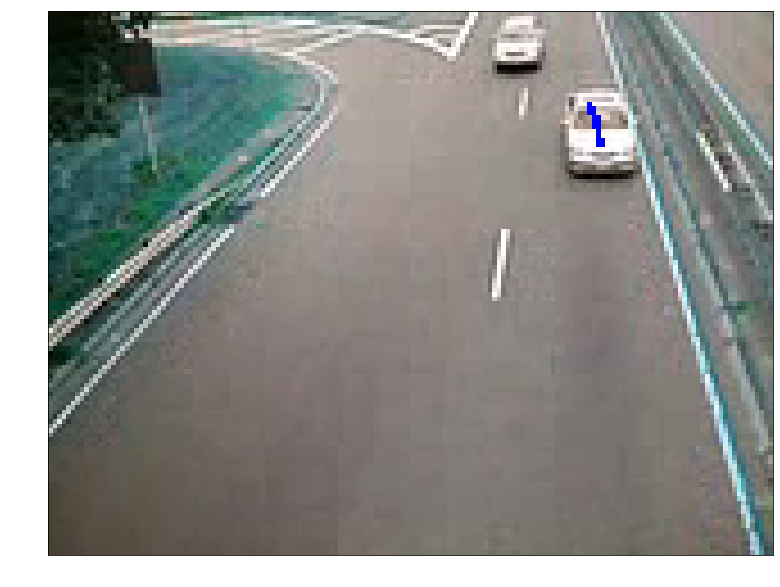

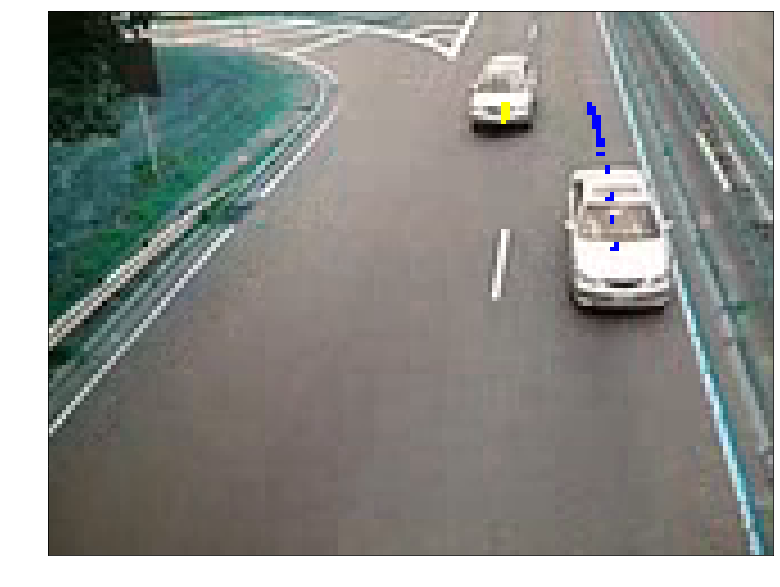

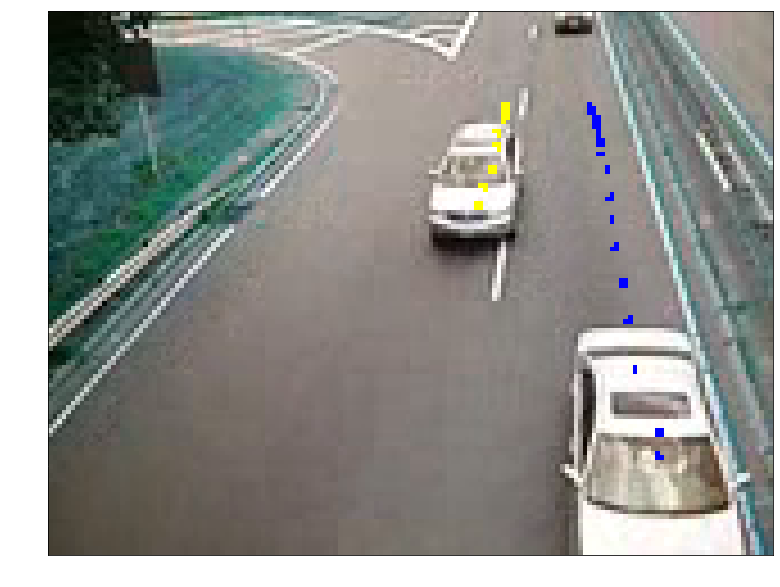

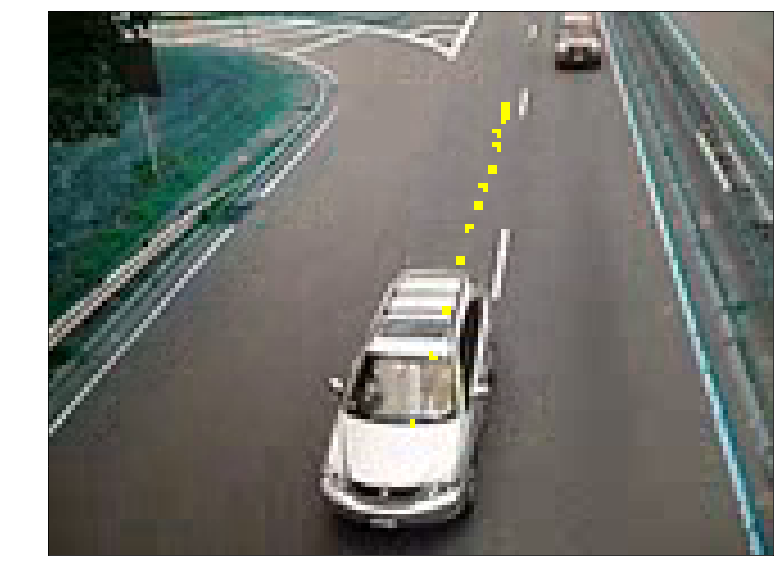

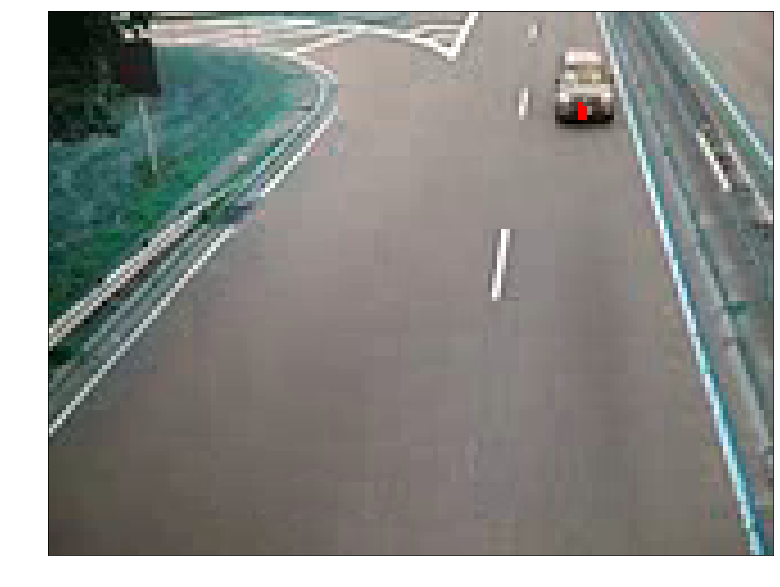

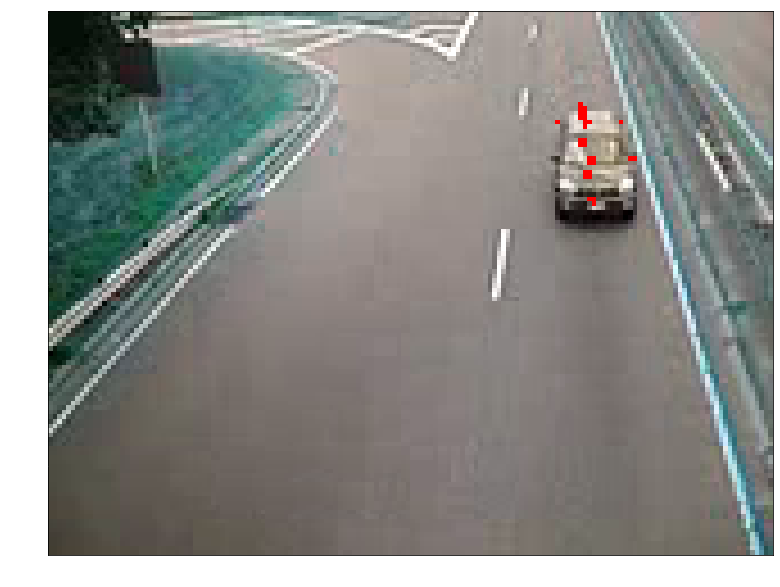

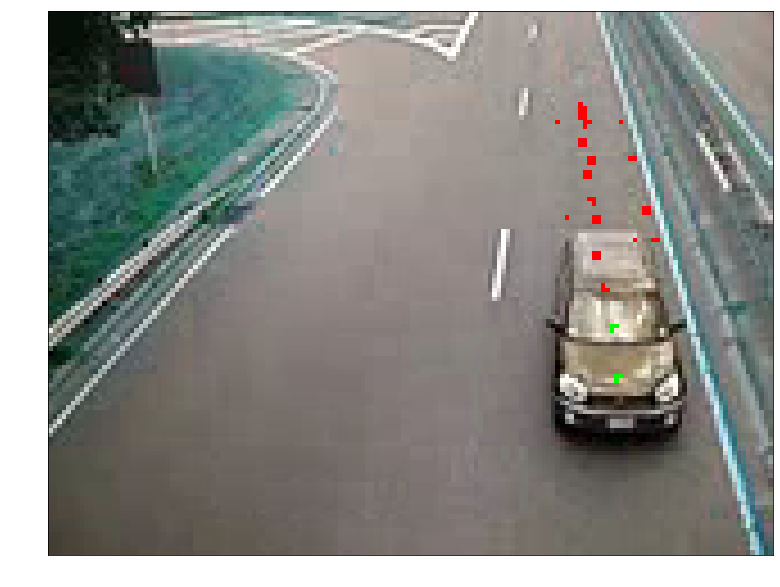

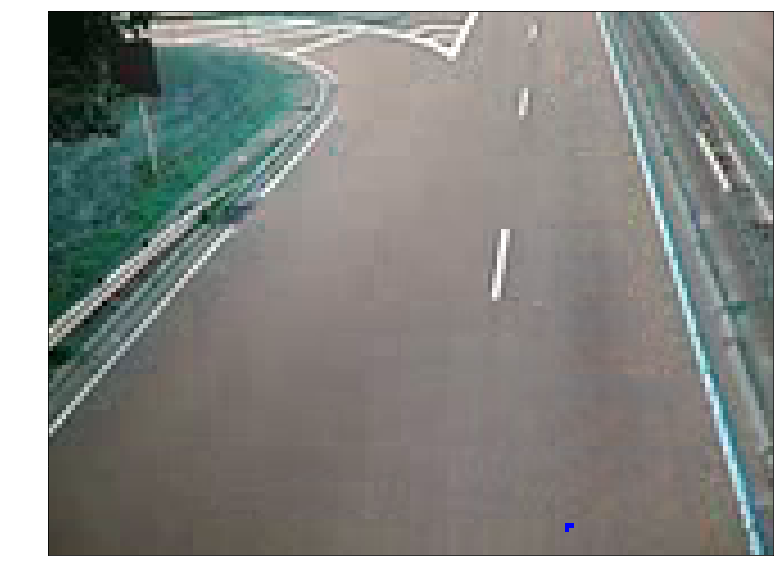

In [17]:
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]
color_array = []
car = 0
line = [[]]

video_capture = cv2.VideoCapture(video_path)
frame_index = 0

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('./imgs/tracking_cars.avi', fourcc, fps, (height, width))

while video_capture.isOpened():
    ret, frame = video_capture.read()
    if ret:
        diff_image = np.abs(rgb2gray(background_image) - rgb2gray(frame))
        diff_image[0:20, :] = 0
        diff_thresholded = diff_image * 255 > 90
        diff_thresholded[20:54, :] = morphology.closing(diff_thresholded[20:54, :], morphology.disk(6))
        diff_thresholded[20:54, :] = morphology.remove_small_holes(diff_thresholded[20:54, :], area_threshold=30)
        diff_thresholded[54:88, :] = morphology.closing(diff_thresholded[54:88, :], morphology.disk(9))
        diff_thresholded[54:88, :] = morphology.remove_small_holes(diff_thresholded[54:88, :], area_threshold=100)
        diff_thresholded[88:120, :] = morphology.closing(diff_thresholded[88:120, :], morphology.disk(13))
        diff_thresholded[88:120, :] = morphology.remove_small_holes(diff_thresholded[88:120, :], area_threshold=150)
        label_img = label(diff_thresholded)
        regions = regionprops(label_img)
        centroids = []
        for region in regions:
            rr, cc = circle(region.centroid[0], region.centroid[1], 1)
            centroids.append((region.centroid[0], region.centroid[1]))

        if len(centroids) > 0:
            line_new = []
            color_array_new = []
            for center in centroids:
                if len(line[-1]) > 0:
                    min_dist = 5000
                    index_min_dist = 0
                    for i in range(len(line)):
                        dist = np.sqrt((np.subtract(center, line[i][-1]) ** 2).sum())
                        if dist < min_dist:
                            min_dist = dist
                            index_min_dist = i

                    if min_dist < 25:
                        line[index_min_dist].append(center)
                        line_new.append(line[index_min_dist])
                        color_array_new.append(color_array[index_min_dist])
                    else:
                        traject = [center]
                        line_new.append(traject)
                        color_array_new.append(car % 4)
                        car += 1
                else:
                    traject = [center]
                    line_new.append(traject)
                    color_array_new.append(car % 4)
                    car += 1
            line = line_new
            color_array = color_array_new
        if len(line[-1]) > 0:
            for j in range(len(line)):
                for k in range(len(line[j])):
                    rr, cc = circle(line[j][k][0], line[j][k][1], 1)
                    frame[rr, cc, 0] = colors[color_array[j]][0]
                    frame[rr, cc, 1] = colors[color_array[j]][1]
                    frame[rr, cc, 2] = colors[color_array[j]][2]

        out.write(frame)

        frame_index += 1
        if frame_index % 5 == 0:
            plt.figure(figsize=(15, 10))
            plt.imshow(frame)
    else:
        break

print(car)

video_capture.release()
out.release()


